In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

     |████████████████████████████████| 5.6 MB 4.6 MB/s 
     |████████████████████████████████| 51 kB 5.9 MB/s 
Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
conn = sqlite3.connect('/gdrive/My Drive/wjazzd.db')
conn.row_factory = sqlite3.Row

In [ ]:
def visualize_tune(results):
    # Declaring a figure "gnt"
  fig, (gnt, sgnt) = plt.subplots(2)


  #gs = fig.add_gridspec(2,2)
  #gnt = fig.add_subplot(gs[0,:])
  #sgnt = fig.add_subplot(gs[1,:])
  # gnt = fig.add_subplot(2,1)
  # sgnt = fig.add_subplot(2,2)
  
  # Setting Y-axis limits
  gnt.set_ylim(min(results.pitch)-1.0, max(results.pitch)+1.0)
  print("Min pitch: ", min(results['pitch']))
  print("Max pitch: ", max(results['pitch']))

  max_time = (results.onset.iloc[-1]+results.duration.iloc[-1])
  
  # Setting X-axis limits
  gnt.set_xlim(0, max_time)
 
  # Setting labels for x-axis and y-axis
  gnt.set_xlabel('Solo time')
  sgnt.set_xlabel('Solo time')
  gnt.set_ylabel('Pitch')
 
  # Setting ticks on y-axis
  gnt.set_yticks(np.linspace(min(results.pitch), max(results.pitch), int(max(results.pitch)-min(results.pitch)+1)))
  # Labelling tickes of y-axis
  # gnt.set_yticklabels(results.pitch.unique())
 
  # Setting graph attribute
  gnt.grid(True)
  sgnt.grid(True)
 
  for idx, note in results.iterrows():
    gnt.broken_barh([(note.onset,note.duration)], (note.pitch-0.2,0.4), facecolors=('tab:red'))

  #Process for form, chorus, and chord boundaries
  #sgnt.broken_barh([(note.onset,note.duration)], (0.5,1), facecolors='C{:d}'.format(int(note.CHORUS.strip('-'))))

  section_categories = ['CHORD', 'FORM', 'CHORUS', 'IDEA', 'PHRASE', 'bar']

  boundaries = {}
  for type in section_categories:
    boundaries[type] = []
    boundaries[type].append({"start": 0, "val": results.iloc[0][type]})
    val = ''
    last_val = ''
    for note_val in results.to_dict(orient="records"):
      #print(note_val)
      if val is not note_val[type]:
        val = note_val[type]
        # print(note_val)
        boundaries[type].append({"start": note_val['onset'], "val": note_val[type]})
      last_val = note_val
    boundaries[type].append({"start": last_val['onset']+last_val['duration'], "val": last_val[type]})
  
  print("boundaries:")
  print(boundaries)

  gnt.set_xticks([boundaries['bar'][x]['start'] for x in range(len(boundaries['bar']))])
    
  sgnt.set_ylim(-0.5, len(boundaries.keys()))
  sgnt.set_xlim(0, max_time)

  key_enum = 0
  for key in section_categories:
    sec_enum = 0
    for i in range(len(boundaries[key])):
      if(i+1 >= len(boundaries[key])):
        break
      time_diff = boundaries[key][i+1]["start"] - boundaries[key][i]["start"]
      sgnt.broken_barh([(boundaries[key][i]["start"],time_diff)], 
                       (key_enum-0.3, 0.6), 
                       facecolors='C{:d}'.format(sec_enum))
      
      sgnt.annotate(boundaries[key][i]["val"], # this is the text
              (boundaries[key][i]["start"],key_enum), # these are the coordinates to position the label
              textcoords="offset points", # how to position the text
              xytext=(10,0), # distance from text to points (x,y)
              ha='center') # horizontal alignment can be left, right or center
      sec_enum += 1
    key_enum += 1

  sgnt.set_yticks(range(len(section_categories)))
  sgnt.set_yticklabels(section_categories)

  fig.set_size_inches(23, 20)

  fig2, (ax2, ax3, ax4) = plt.subplots(nrows=3, ncols=1) # two axes on figure
  print(min(results.division))
  print(max(results.division))
  fig2.set_size_inches(18.5, 10.5)
  ax2.hist(results.division, bins=6)
  ax3.hist(results.pitch, bins=int(max(results.pitch)-min(results.pitch)+1))
  ax4.hist(results.duration, bins=6)
  plt.show()
  #test

In [ ]:
#Get the solo info

mid = 24
num_songs = 1
cur = conn.execute("select * FROM solo_info where melid=%s" % mid)
for tune in cur: #For each tune
  for key in tune.keys():
    #print(key, tune[key])
    print('okay')

  # Get the melody of the tune as a database cursor
  melody_cur = conn.execute("select pitch,duration,onset,division,bar,beat,tatum,num,denom,beatprops from melody where melid=%s" % tune['melid'])
  section_cur = conn.execute("select * from sections where melid=%s" % tune['melid'])

  # Extract the melody info from this tune's melody entry
  results = pd.DataFrame.from_records(data = melody_cur.fetchall(), columns = [col[0] for col in melody_cur.description])
  print(results)
  sections = pd.DataFrame.from_records(data = section_cur.fetchall(), columns = [col[0] for col in section_cur.description])

  annotations = {}
  for sec_type in sections.type.unique():
    annotations[sec_type] = []
    for bars in sections.loc[sections.type == sec_type].itertuples():
      for i in range(bars.start, bars.end+1):
        annotations[sec_type].append(bars.value)

    results[sec_type] = annotations[sec_type]

    print('pitch here',results['pitch'])
  # for x in results.itertuples():
  #   print(x)
    

  #Plot the solo for testing
  #visualize_tune(results)

okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
okay
     pitch  duration       onset  division  bar  beat  tatum  num  denom  \
0     53.0  0.206122    8.038776         2    1     1      2    4      4   
1     57.0  0.963265    8.259184         1    1     2      1    4      4   
2     59.0  0.451020   10.102041         2    2     3      2    4      4   
3     61.0  0.232653   10.577551         6    3     1      1    4      4   
4     59.0  0.218367   10.869388         6    3     1      6    4      4   
..     ...       ...         ...       ...  ...   ...    ...  ...    ...   
370   54.0  0.201020  133.309184         3   96     2      1    4      4   
371   57.0  0.121429  133.541837         3   96     2      3    4      4   
372   59.0  0.106122  133.676531         4   96     3      2    4      4   
373   57.0  0.120408  133.846939         4   96     3      4    4      4   
374   54.0  0.178571  134.002041         1   96     4      1    4      4   

  

# CREATE MODEL 

In [ ]:
def create_network(network_in):
  
  model = Sequential()
  model.add(LSTM(128, input_shape=network_in.shape, return_sequences=True))  
  model.add(Dropout(0.2))
  model.add(LSTM(128, return_sequences=True))  
  model.add(Flatten())  
  model.add(Dense(256))  
  #model.add(Dropout(0.3))  
  #model.add(Dense(n_vocab))  
  model.add(Activation('softmax'))  
  model.compile(loss='categorical_crossentropy', optimizer='adam')  

  return model

In [ ]:
#print(results.iloc[0: 101])
#print(results.iloc[100])

In [ ]:
#Create pitch-only dataset with sequences of notes
# create input sequences and the corresponding outputs
def get_sequences(results, sequence_length):
  #why do we have 100 columns?
  network_input = np.zeros((results.shape[0], sequence_length))
  
  network_output = np.zeros((results.shape[0],))
  x = 0
  #for i in range(0,275,1)
  for i in range(0, len(results) - sequence_length, 1):
    # contains all info from results for a group of 100 notes 
    sequence_in = results.iloc[i: i + sequence_length]
    
    #contains the pitch information for the next note 
    sequence_out = results.iloc[i + sequence_length]

    network_input[x] = np.array(sequence_in['pitch'])
    network_output[x] = sequence_out['pitch']
    x += 1


  #print('type', type((network_input, network_output)))
  
  return (network_input, network_output)

In [ ]:
import keras
from keras import *
from keras.layers import *
from keras.callbacks import ModelCheckpoint

#print('results shape[1:]',results.shape[1:])

(network_in, network_out) = get_sequences(results, 100)

print('network input',len(network_in))
print('newtwork output',len(network_out))

#where is our training, validation and testing data? 


#CALL MODEL 
model = create_network(network_in)


epochs = 100

filepath = 'weights.best.music3.hdf5'  
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=0, save_best_only=True)  

#model.fit(network_in, network_out, epochs=epochs, batch_size=32, callbacks=[checkpoint])  


network input 375
newtwork output 375
network input 375
newtwork output 375


In [ ]:
split = int(0.8*len(results))

#training = 300 
training = results.iloc[0:split,:]

#testing = 75
testing = results.iloc[split:,:]



In [ ]:
from pandas._libs.lib import generate_bins_dt64
model2 = keras.models.Sequential([
  keras.layers.SimpleRNN(20, return_sequences = True, input_shape = [None,1]),
  keras.layers.SimpleRNN(20, return_sequences = True),
  keras.layers.TimeDistributed(keras.layers.Dense(10))
])

netIN, netOut = get_sequences(training,100)
print(netIN)

yPred = model2.predict(netIN)

#print(len(yPred))
print(yPred)




network input 300
newtwork output 300
[[53. 57. 59. ... 62. 66. 62.]
 [57. 59. 61. ... 66. 62. 59.]
 [59. 61. 59. ... 62. 59. 57.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
[[[-0.12956852  0.27088845  0.41497487 ... -0.6406051  -0.5125568
   -0.34024015]
  [ 0.00631791  0.48322862  0.60765153 ... -0.63790023  0.02600439
   -0.41916397]
  [ 0.03662869  0.33082798  0.58366597 ... -0.85437703 -0.06923814
   -0.2781157 ]
  ...
  [ 0.2319273   0.08468753  0.47552377 ... -1.1052141  -0.2660186
   -0.43483654]
  [ 0.21339925  0.07151759  0.47575948 ... -1.0962209  -0.28015077
   -0.3870651 ]
  [ 0.24419516  0.09531377  0.4474006  ... -1.0989759  -0.27665406
   -0.42620352]]

 [[-0.13640693  0.26111317  0.41543555 ... -0.6364539  -0.5064906
   -0.33563307]
  [-0.00193739  0.48227617  0.60735786 ... -0.63390803  0.02017147
   -0.40038893]
  [ 0.0374549   0.33462474  0.58738136 ... -0.8470514  -0.07360365
   -0.26371112]
  ...
  [ 0.213399

In [ ]:
!pip install pmdarima
from pmdarima.arima import auto_arima

     |████████████████████████████████| 1.4 MB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 40.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


(0.01, False)


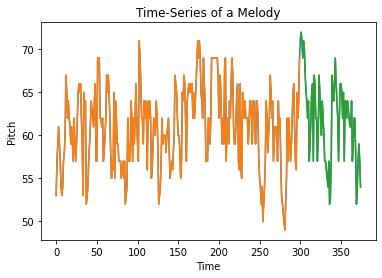

In [ ]:
from pmdarima.arima import ADFTest
notes = results

pitch = notes['pitch']
duration = notes['duration']

pitch.plot()
adf_test = ADFTest(alpha = 0.05)
print(adf_test.should_diff(pitch))

#data is non stationary, so we need to integrate (d)
split = int(len(pitch)*.8)
train = pitch[:split]
test = pitch[split:]



plt.plot(train)
plt.plot(test)
plt.title("Time-Series of a Melody")
plt.xlabel('Time')
plt.ylabel('Pitch')
plt.show()

In [ ]:
acr = plot_acf(train, lags = 50)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.plot()

pcf = plot_pacf(train, lags = 50)
plt.plot()
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')

plt.show()





NameError: ignored

In [ ]:
arima_model = auto_arima(train,start_p=5,d=1,start_q=2,max_p=5,max_q=5,m=12,
                         seasonal=False,error_action='warn',trace=True,supress_warnings=True,
                         stepwise=True,random_state=20,n_fits=50)

#arima_model.summary()

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1656.045, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1647.101, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1641.248, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1654.103, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1607.476, Time=0.76 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1609.475, Time=1.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1609.475, Time=0.79 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1625.361, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1642.814, Time=0.24 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1611.423, Time=1.71 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1605.536, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1639.331, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1645.172, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : 

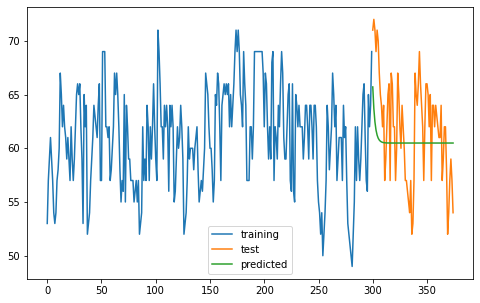

In [ ]:
prediction = pd.DataFrame(arima_model.predict(n_periods=75),index=test.index)
prediction.columns = ['predicted_pitch']
prediction

plt.figure(figsize=(8,5))
plt.plot(train,label="training")
plt.plot(test,label="test")
plt.plot(prediction,label='predicted')
plt.legend()
plt.show()



In [ ]:
  # given pitch and time what is the next pitch at the next time step? 

# accumulate points to get better predictions 

#n_vocab = len(notes)
#network_in, network_out = prepare_sequences(notes, n_vocab)
#create_network 